# Regularization

We use a custom generated dataset for regularization to shwo the effect to regularization.

## Dataset

In [24]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [25]:
# Use the helper code below to generate the data

# Defines the number of data points to generate
num_points = 100

# Generate predictor points (x) between 0 and 5
x = np.linspace(0, 5, num_points)

# Generate the response variable (y) using the predictor points
y = x * np.sin(x) + np.cos(x) + np.random.normal(loc=0, scale=1, size=num_points)

# Generate data of the true function y = x*sin(x) 
# x_b will be used for all predictions below 
x_b = np.linspace(0, 5, 100)
y_b = x_b * np.sin(x_b) + np.cos(x_b)

In [26]:
# Split the data into train and test sets with .33 and random_state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train = np.reshape(x_train, newshape=(-1, 1)).astype(np.float32)
x_test = np.reshape(x_test, newshape=(-1, 1)).astype(np.float32)
y_train = np.reshape(y_train, newshape=(-1, 1)).astype(np.float32)
y_test = np.reshape(y_test, newshape=(-1, 1)).astype(np.float32)

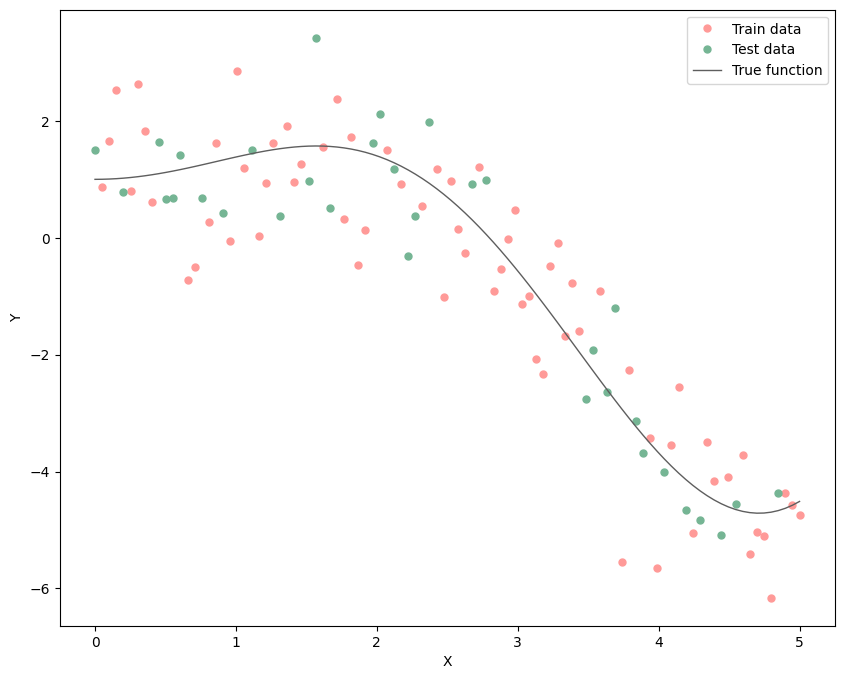

In [27]:
plt.rcParams["figure.figsize"] = (10,8)

# Plot the train data
plt.plot(x_train,y_train, '.', label='Train data', markersize=10, color='#FF9A98')

# Plot the test data
plt.plot(x_test,y_test, '.', label='Test data', markersize=10, color='#75B594')

# Plot the true data
plt.plot(x_b, y_b, '-', label='True function', linewidth=1, color='#5E5E5E')

# Set the axes labels
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Create a neural network (sequential model)

In [35]:
# Your model code here
import torch
import torch.nn as nn
import torch.optim as optim


class OverfittingModel(nn.Module):
    def __init__(self):
        super(OverfittingModel, self).__init__()
        self.fc1 = nn.Linear(1, 1000)  # Large hidden layer
        self.fc2 = nn.Linear(1000, 1000)  # Another large hidden layer
        self.fc3 = nn.Linear(1000, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Convert data to PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

# Instantiate the model, loss function, and optimizer
model = OverfittingModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 1000 epochs
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the original data and the fitted curve
with torch.no_grad():
    y_pred = model(torch.tensor(x_b.reshape(-1, 1), dtype=torch.float32)).numpy()

plt.scatter(x, y, label='Original data')
plt.plot(x_b, y_pred, color='red', linewidth=2, label='Fitted curve')
plt.legend()
plt.show() 




Epoch [1000/10000], Loss: 0.9223


KeyboardInterrupt: 

In [ ]:
# Please use the training and evaluation methods for your model(s)

import torch
torch.manual_seed(42)
from torch.utils.data import DataLoader, TensorDataset

def train_model(
    model, optimizer, loss_fn, x_dataset, y_dataset, epochs, batch_size
):
    data_loader = DataLoader(dataset=TensorDataset(torch.as_tensor(x_dataset), torch.as_tensor(y_dataset)), batch_size=batch_size, shuffle=True)
    for epoch in range(0, epochs):
        for data in data_loader:
            x, y = data
            output = model(x)

            optimizer.zero_grad()
            loss = loss_fn(output, y)
            loss.backward()

            optimizer.step()
        
        if epoch % 100 == 0:
            print(f'Epoch: {epoch}; Loss: {loss}')
    
    return model


def eval_model(
    model, x_train, y_train, x_test
):
    x_train = torch.as_tensor(x_train)
    y_train = torch.as_tensor(y_train)

    x_test = torch.as_tensor(x_test)
    # y_test = torch.as_tensor(y_test)
    
    train_output = model(x_train).detach()
    test_output = model(x_test).detach()

    plt.rcParams["figure.figsize"] = (10,8)

    # Plot the true train data
    plt.plot(x_train, y_train, '.', label='Train true data', markersize=15, color='#000000')

    # Plot the predicted train data
    plt.plot(x_train, train_output, '.', label='Train predictions', markersize=15, color='#FF9A98')

    # Plot the test predictions
    plt.plot(x_test, test_output, '.', label='Test predictions', markersize=15, color='#75B594')

    # Plot the true data
    plt.plot(x_b, y_b, '-', label='True function', linewidth=3, color='#5E5E5E')

    # Set the axes labels
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

model = OverfittingModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
# Training the model
model = train_model(model, optimizer, criterion, x_train, y_train, epochs=10000, batch_size=32)
# Evaluating the model
eval_model(model, x_train, y_train, x_test)

## Initialize an unregularized network

In [ ]:
# Init your model

import torch.optim as optim
import torch.nn.functional as F

# create your model
class UnregularizedModel(nn.Module):
    def __init__(self):
        super(UnregularizedModel, self).__init__()
        self.fc1 = nn.Linear(1, 1000)
        self.fc2 = nn.Linear(1000, 1000)
        self.fc3 = nn.Linear(1000, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

unregularized_model = UnregularizedModel()
print(unregularized_model)
# Init the adam optimizer
optimizer = optim.Adam(unregularized_model.parameters(), lr=0.001)
# Define MSE loss as loss function
criterion = nn.MSELoss()


UnregularizedModel(
  (fc1): Linear(in_features=1, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=1, bias=True)
)


### Train and evalute the model

In [ ]:
# Training the unregularized model
batch_size = 10
epochs = 1500

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
# Train the model
unregularized_model = train_model(unregularized_model, optimizer, criterion, x_train, y_train, epochs=epochs, batch_size=batch_size)
# Evaluate the unregularized model
eval_model(unregularized_model, x_train, y_train, x_test)




## Initialize a neural network with dropout

In [ ]:
import torch.optim as optim
import torch.nn.functional as F

class DropoutModel(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(DropoutModel, self).__init__()
        self.fc1 = nn.Linear(1, 1000)
        self.dropout1 = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(1000, 1000)
        self.dropout2 = nn.Dropout(p=dropout_rate)
        self.fc3 = nn.Linear(1000, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Instantiate the dropout model
dropout_model = DropoutModel()
print(dropout_model)
# Init the Adam optimizer
optimizer = optim.Adam(dropout_model.parameters(), lr=0.001)
# Define Mean Squared Error (MSE) loss as the loss function
criterion = nn.MSELoss()


DropoutModel(
  (fc1): Linear(in_features=1, out_features=1000, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=1000, out_features=1, bias=True)
)


### Train and evalute the model

In [ ]:
# use a batch size of 10
batch_size = 10
# use 1500 epochs
epoch = 1500
# use the train_model method to train the model
dropout_model = train_model(dropout_model, optimizer, criterion, x_train, y_train, epochs, batch_size=batch_size)
# use the eval_model method to plot the results
eval_model = eval_model(dropout_model, x_train, y_train, x_test)



## Initialize a model with L2 regularization

In [ ]:
# Init your model

import torch.optim as optim
import torch.nn.functional as F

# create your model
class L2RegularizedModel(nn.Module):
    def __init__(self):
        super(L2RegularizedModel, self).__init__()
        self.fc1 = nn.Linear(1, 1000)
        self.fc2 = nn.Linear(1000, 1000)
        self.fc3 = nn.Linear(1000, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the L2 regularized model
l2_model = L2RegularizedModel()
print(l2_model)

# Init the Adam optimizer with weight decay for L2 regularization
optimizer = optim.Adam(l2_model.parameters(), lr=0.001, weight_decay=0.001)  # Adjust weight_decay as needed

# Define Mean Squared Error (MSE) loss as the loss function
criterion = nn.MSELoss()

L2RegularizedModel(
  (fc1): Linear(in_features=1, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=1, bias=True)
)


### Train and evaluate the model

In [ ]:
# use a batch size of 10
batch_size = 10
# use 1500 epochs
epoch = 1500
# use the train_model method to train the model
dropout_model = train_model(dropout_model, optimizer, criterion, x_train, y_train, epochs, batch_size=batch_size)
# use the eval_model method to plot the results
eval_model = eval_model(dropout_model, x_train, y_train, x_test)


## Initialize a model with L1 regularization

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Define the model
class L1RegularizedModel(nn.Module):
    def __init__(self):
        super(L1RegularizedModel, self).__init__()
        self.fc1 = nn.Linear(1, 1000)
        self.fc2 = nn.Linear(1000, 1000)
        self.fc3 = nn.Linear(1000, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the L1 regularized model
l1_model = L1RegularizedModel()
print(l1_model)

# Init the Adam optimizer
optimizer = optim.Adam(l1_model.parameters(), lr=0.001)

# Define Mean Squared Error (MSE) loss as the loss function
criterion = nn.MSELoss()
l1_strength = 0.001

# Convert data to PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

# Create a data loader
batch_size = 10
train_dataset = TensorDataset(x_train, y_train)
data_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Training loop with L1 regularization
def train_l1_regularized_model(model, optimizer, criterion, data_loader, epochs, l1_strength):
    for epoch in range(epochs):
        for data in data_loader:
            x, y = data
            output = model(x)

            optimizer.zero_grad()
            loss = criterion(output, y)

            # Compute L1 regularization
            l1_reg = 0
            for param in model.parameters():
                l1_reg += torch.abs(param).sum()

            # Add L1 penalty to the loss
            loss += l1_strength * l1_reg

            loss.backward()
            optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}; Loss: {loss}')

    return model

# Train the L1 regularized model
l1_model = train_l1_regularized_model(l1_model, optimizer, criterion, data_loader, epochs=1500, l1_strength=l1_strength)


### Train and evaluate the model

Epoch: 0; Loss: 0.6794450879096985
Epoch: 100; Loss: 0.6641712188720703
Epoch: 200; Loss: 1.375199317932129
Epoch: 300; Loss: 1.6014502048492432
Epoch: 400; Loss: 0.7771466374397278
Epoch: 500; Loss: 1.2074648141860962
Epoch: 600; Loss: 0.7729595899581909
Epoch: 700; Loss: 0.20571042597293854
Epoch: 800; Loss: 0.37704992294311523
Epoch: 900; Loss: 1.6358630657196045
Epoch: 1000; Loss: 0.9872323870658875
Epoch: 1100; Loss: 0.9179908037185669
Epoch: 1200; Loss: 0.5350366234779358
Epoch: 1300; Loss: 0.9478288888931274
Epoch: 1400; Loss: 0.1915966421365738


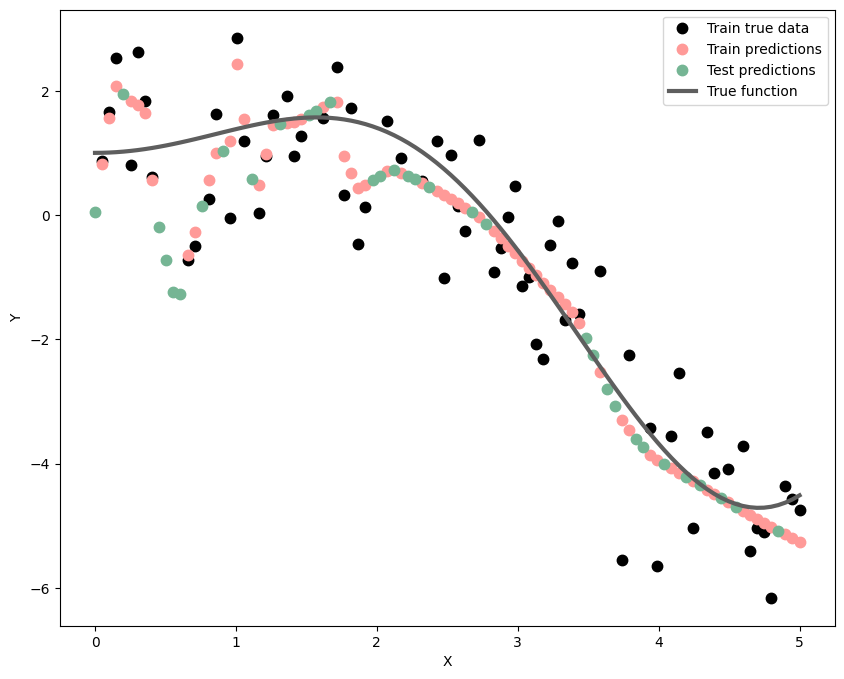

In [34]:
# use a batch size of 10
batch_size = 10
# use 1500 epochs
epoch = 1500
# use the train_model method to train the model

l1_model = train_model(l1_model, optimizer, criterion, x_train, y_train, epochs, batch_size= batch_size)

# use the eval_model method to plot the results
eval_model = eval_model(l1_model, x_train, y_train, x_test)
